In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preparation

# a. Load the dataset using pandas.

In [25]:
data = pd.read_csv('Bangalore_house_data.csv')
data


,area_type,availability,location,size,total_sqft,bath,balcony,price(US$)
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2,1,51.00
...,...,...,...,...,...,...,...,...
494,Super built-up Area,18-Apr,Electronic City,2 BHK,1128.0,2,1,63.00
495,Super built-up Area,Ready To Move,Omkar Nagar,2 BHK,1000.0,2,1,53.00
496,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1035.0,2,1,45.00
497,Built-up Area,Ready To Move,Kereguddadahalli,2 BHK,950.0,2,1,32.00


In [26]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price(US$)
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2,1,51.00


In [27]:
data.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price(US$)
494,Super built-up Area,18-Apr,Electronic City,2 BHK,1128.0,2,1,63.0
495,Super built-up Area,Ready To Move,Omkar Nagar,2 BHK,1000.0,2,1,53.0
496,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1035.0,2,1,45.0
497,Built-up Area,Ready To Move,Kereguddadahalli,2 BHK,950.0,2,1,32.0
498,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,1075.0,2,1,36.0


# b. Explore and clean the data. Handle missing values and outliers.


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     499 non-null    object 
 1   availability  499 non-null    object 
 2   location      499 non-null    object 
 3   size          499 non-null    object 
 4   total_sqft    499 non-null    float64
 5   bath          499 non-null    int64  
 6   balcony       499 non-null    int64  
 7   price(US$)    499 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 31.3+ KB


In [6]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price(US$)      0
dtype: int64

In [28]:
data.describe()

,total_sqft,bath,balcony,price(US$)
count,499.000000,499.000000,499.000000,499.000000
mean,1518.238257,2.679359,1.595190,106.935000
std,989.665181,1.263241,0.814315,132.194153
min,11.000000,1.000000,0.000000,11.000000
25%,1082.000000,2.000000,1.000000,50.000000
50%,1270.000000,2.000000,2.000000,72.000000
75%,1662.000000,3.000000,2.000000,120.000000
max,12000.000000,9.000000,3.000000,2200.000000


# c. Split the dataset into training and testing sets.

In [30]:
x=data.iloc[:,-4:-3]
x.head(5)

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0


In [31]:
y=data.iloc[:,-1:]
y.head(5)

,price(US$)
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [32]:
type(x)

pandas.core.frame.DataFrame

In [33]:
type(y)

pandas.core.frame.DataFrame

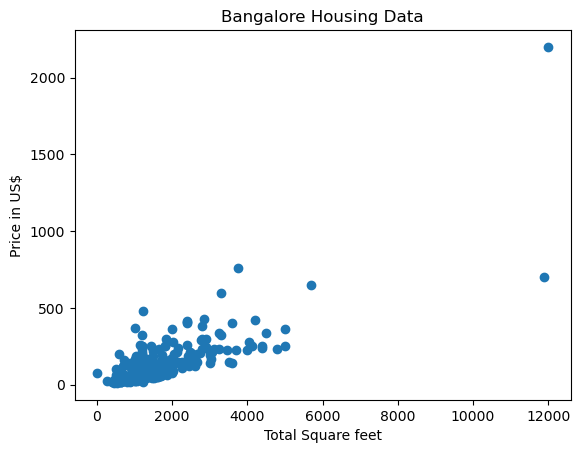

In [34]:
plt.scatter(x,y)
plt.title("Bangalore Housing Data")
plt.xlabel("Total Square feet")
plt.ylabel("Price in US$")
plt.show()

In [44]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 2. Implement Simple Linear Regression:

# a. Choose a feature (e.g. square footage) as the independent variable (X) and house prices as the dependent variable (y).

# b. implement a simple linear regression model using sklearn to predict house prices based on the selected feature.

# c. Visualize the data and the regression line.


In [62]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
#Train the data
print("Training Started......\n")
print()
slr.fit(x_train,y_train)
print()
print("Training Completed......\n")
print()
#Test the Data
print("Testing Invoked.....\n")
y_pred=slr.predict(x_test)
print("Predicted Total Payment\n",y_pred)
print('\n Testing completed....\n')



Training Started......



Training Completed......


Testing Invoked.....

Predicted Total Payment
 [[178.91659133]
 [ 82.27159065]
 [ 74.92337572]
 [103.03828501]
 [137.62281831]
 [105.67405776]
 [ 64.69977234]
 [ 79.07671459]
 [ 79.07671459]
 [ 64.69977234]
 [ 79.07671459]
 [103.03828501]
 [110.38649994]
 [ 79.07671459]
 [ 35.14716883]
 [174.12427724]
 [ 75.08311952]
 [ 79.07671459]
 [ 47.12795404]
 [123.24587606]
 [100.16289656]
 [ 64.30041284]
 [ 75.08311952]
 [108.54944621]
 [ 75.88183854]
 [ 79.07671459]
 [181.55236407]
 [ 23.16638362]
 [183.78877731]
 [ 91.0574998 ]
 [ 95.05109487]
 [ 75.08311952]
 [382.58993987]
 [ 98.24597093]
 [194.89097161]
 [334.66679903]
 [121.88805374]
 [154.4757895 ]
 [ 39.77973911]
 [ 85.46646671]
 [ 89.22044607]
 [ 63.10233432]
 [118.45356198]
 [ 51.12154911]
 [ 67.57516079]
 [205.67367829]
 [ 78.43773938]
 [ 91.0574998 ]
 [102.95841311]
 [142.9742357 ]
 [111.02547515]
 [115.01907022]
 [ 74.68376002]
 [ 97.92648332]
 [204.47559977]
 [ 79.07671459]
 [94

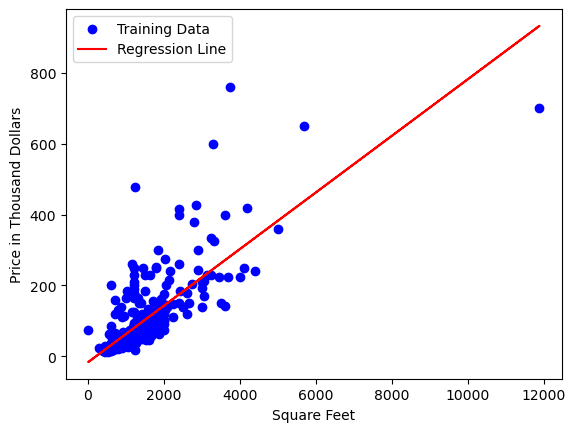

In [55]:
plt.scatter(x_train,y_train,color = 'blue',label='Training Data')
plt.plot(x_train,slr.predict(x_train),color = 'red', label = 'Regression Line')
plt.xlabel('Square Feet')
plt.ylabel('Price in Thousand Dollars')
plt.legend()
plt.show()

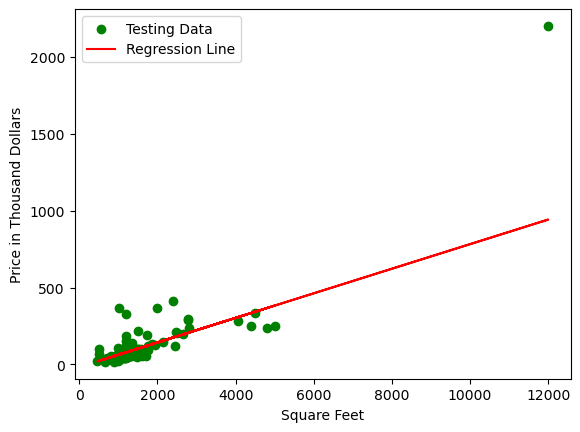

In [56]:
plt.scatter(x_test,y_test,color = 'green',label='Testing Data')
plt.plot(x_test,slr.predict(x_test),color = 'red', label = 'Regression Line')
plt.xlabel('Square Feet')
plt.ylabel('Price in Thousand Dollars')
plt.legend()
plt.show()

# 3. Evaluate the Simple Linear Regression Model:

# a Use scikit-learn to calculate the R-squared value to assess the goodness of fit

# b. interpret the R-squared value and discuss the model's performance

In [63]:
from sklearn.metrics import r2_score


# Calculate R-squared value
r2_value = r2_score(y_test, y_pred)
print(f'R-squared value: {r2_value}')


R-squared value: 0.6044596849417538


# 4. Implement Multiple Linear Regression:

# a. Select multiple features (e.g., square footage, number of bedrooms, number of bathrooms) as independent variables (X) and house prices as the dependent variable (y).

# b. Implement a multiple linear regression model using scikit-learn to predict house prices based on the selected features.


In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("Bangalore_house_data.csv")
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price(US$)
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2,1,51.00


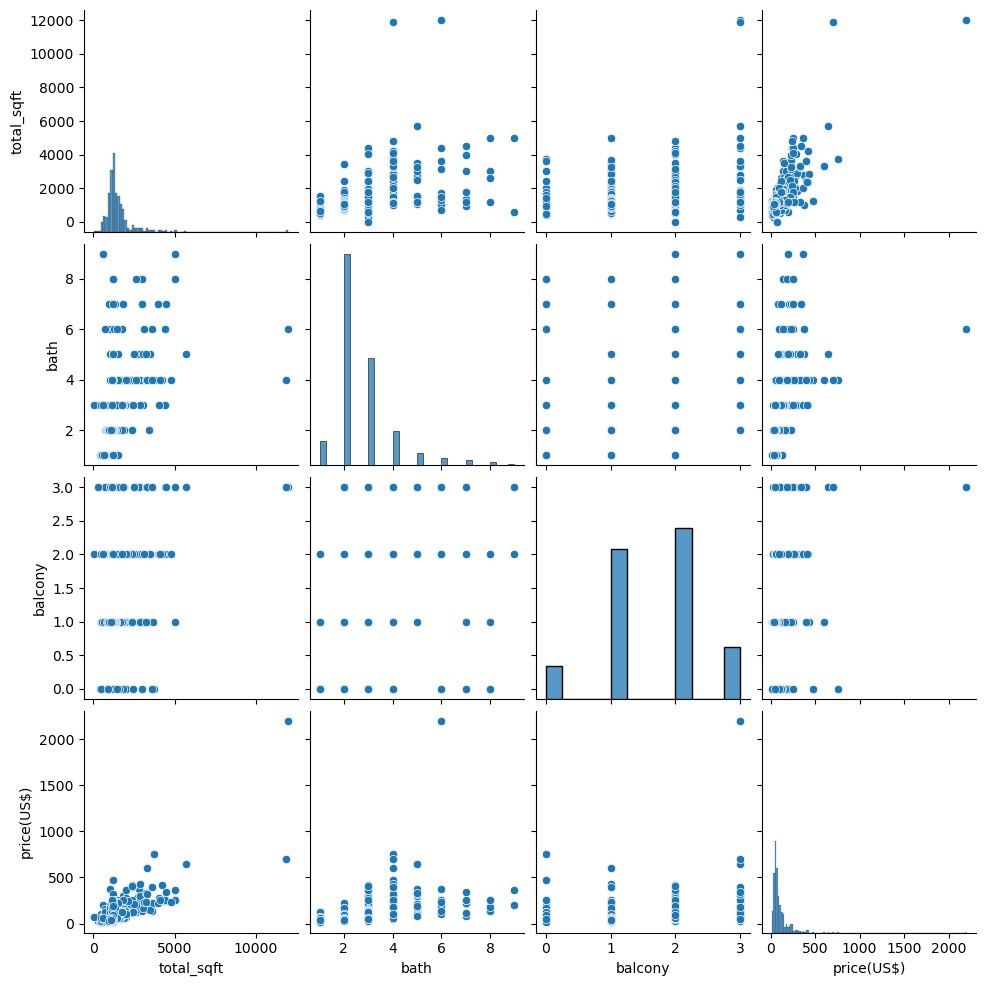

In [72]:
sns.pairplot(df)

In [95]:
x=data.iloc[:,4:-1]
x.head(5)

,total_sqft,bath,balcony
0,1056.0,2,1
1,2600.0,5,3
2,1440.0,2,3
3,1521.0,3,1
4,1200.0,2,1


In [98]:
y=data.iloc[:,-1:]
y.head(5)

,price(US$)
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [91]:
# Selecting multiple features
features = ['total_sqft', 'bath', 'balcony']
x = data[features]
y = data['price(US$)']


In [85]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
#Train the data
print("Training Started......\n")
print()
mlr.fit(x_train,y_train)
print()
print("Training Completed......\n")
print()
#Test the Data
print("Testing Invoked.....\n")
y_pred=mlr.predict(x_test)
print("Predicted Total Payment\n",y_pred)
print('\n Testing completed....\n')


Training Started......



Training Completed......


Testing Invoked.....

Predicted Total Payment
 [189.36712767  76.85181503  61.30655842 107.53381904 145.66823131
 146.08788975  62.27816621  64.75123905  64.75123905 144.46503463
  64.75123905 107.53381904 113.628254   133.4795066   14.85851615
 166.49085288  61.43904614 129.47172737  57.15533904 124.29351518
 105.14904015  52.49612528  74.89764701 121.55546691  62.10148472
 110.57008408 218.47037673  41.2899608  165.05553809 208.13657366
  87.45083235  51.9882245  463.38525713  71.19894339 206.62367854
 358.91845387 210.79728043 150.19486376  18.70065992  70.05074771
  73.16420905  87.87049079 110.86806204  41.56588867  64.66294511
 229.02520028  64.22128819  84.13863943 153.28642022 140.65574817
 155.96927067 117.47039778  61.10782685 112.74503376 214.57294153
 106.56230486 862.37177655  69.4325029   67.40099338  92.45226945
  83.65288234  60.97533913  80.49522723  65.92157842 115.43888826
 225.67985963  94.60516904  41.2899608  13

# 5. Evaluate the Multiple Linear Regression Model:

# a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

# b. Discuss the advantages of using multiple features in regression analysis.

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Make predictions on the entire dataset
y_pred = mlr.predict(x_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_value = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): ',mae)
print(f'Mean Squared Error (MSE): ',mse)
print(f'Root Mean Squared Error (RMSE): ',rmse)
print(f'R-squared value: ',r2_value)


Mean Absolute Error (MAE):  51.214637500596425
Mean Squared Error (MSE):  21738.752993085993
Root Mean Squared Error (RMSE):  147.44067618227336
R-squared value:  0.5717797939700604
